In [1]:
import yfinance as yf
import pandas as pd


def acquire_stock_price(ticker_name_index, trade_date_index):
    ticker_list = ['AZN.L', 'BATS.L', 'BHP.L', 'DGE.L', 'HSBA.L', 'RIO.L', 'RKT.L', 'SHEL.L', 'ULVR.L', 'VOD.L']
    ticker_name = ticker_list[ticker_name_index]
    trade_date_list = ['2024-01-17', '2024-02-16', '2024-03-15', '2024-04-17']
    trade_date_later = ['2024-01-18', '2024-02-17', '2024-03-16', '2024-04-18']
    trade_date = trade_date_list[trade_date_index]
    next_trade_date = trade_date_later[trade_date_index]
    ticker = yf.Ticker(ticker_name)
    ticker_historical_price = ticker.history(start=trade_date, end=next_trade_date, interval='1d')
    return ticker_historical_price['Open'].tolist()[0]


def acquire_option_price(ticker_name_index, trade_date_index):
    ticker_list_no_l = ['AZN', 'BATS', 'BHP', 'DGE', 'HSBA', 'RIO', 'RKT', 'SHEL', 'ULVR', 'VOD']
    ticker_name = ticker_list_no_l[ticker_name_index]
    csv_file_name = ticker_name + ' portfolio construction sheet.csv'
    csv_file = pd.read_csv(csv_file_name)
    return csv_file.iloc[trade_date_index + 4, 5]


def acquire_option_middle_strike(ticker_name_index, trade_date_index):
    ticker_list_no_l = ['AZN', 'BATS', 'BHP', 'DGE', 'HSBA', 'RIO', 'RKT', 'SHEL', 'ULVR', 'VOD']
    ticker_name = ticker_list_no_l[ticker_name_index]
    csv_file_name = ticker_name + ' portfolio construction sheet.csv'
    csv_file = pd.read_csv(csv_file_name)
    return csv_file.iloc[trade_date_index + 4, 6]

In [33]:
strike_list1 = []
for i in range(10):
    a = acquire_option_middle_strike(i, 0)
    strike_list1.append(a)
print(strike_list1)

['10400', '2300', '2400', '2700', '580', '5500', '5600', '2400', '3900', '65']


In [34]:
strike_list2 = []
for i in range(10):
    a = acquire_option_middle_strike(i, 1)
    strike_list2.append(a)
print(strike_list2)

['10000', '2400', '2400', '2900', '640', '5600', '5600', '2475', '4000', '65']


In [36]:
strike_list3 = []
for i in range(10):
    a = acquire_option_middle_strike(i, 2)
    strike_list3.append(a)
print(strike_list3)

['10400', '2300', '2175', '2900', '600', '4800', '4550', '2550', '3900', '70']


In [37]:
strike_list4 = []
for i in range(10):
    a = acquire_option_middle_strike(i, 3)
    strike_list4.append(a)
print(strike_list4)

['11000', '2250', '2325', '2800', '640', '5400', '4100', '2850', '3750', '66']


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
ticker_list = ['AZN.L', 'BATS.L', 'BHP.L', 'DGE.L', 'HSBA.L', 'RIO.L', 'RKT.L', 'SHEL.L', 'ULVR.L', 'VOD.L']
complete_return_list = []


def calculate_stock_return(price_list):
    return_list = []
    for i in range(1, len(price_list)):
        return_list.append((price_list[i]/price_list[i-1] - 1))
    return return_list


def fit_missing_stock_price(complete_date_list, incomplete_date_list, incomplete_stock_price):
    missing_date_list = []
    for i in range(len(complete_date_list)):
        date = complete_date_list[i]
        if date not in incomplete_date_list:
            missing_date_list.append(i)
    output_list = incomplete_stock_price
    for missing_date in missing_date_list:
        missing_price = 0.5 * (incomplete_stock_price[missing_date-1] + incomplete_stock_price[missing_date])
        output_list = output_list[:missing_date] + [missing_price] + output_list[missing_date:]
    return output_list


index = 0
ticker = yf.Ticker(ticker_list[index])
ticker_historical = ticker.history(start='2022-12-30', end='2023-12-31', interval='1d')
complete_trading_date = ticker_historical.index.tolist()
for index in range(len(ticker_list)):
    ticker = yf.Ticker(ticker_list[index])
    ticker_historical = ticker.history(start='2022-12-30', end='2023-12-31', interval='1d')
    ticker_open_frame = ticker_historical.iloc[:, 1]
    incomplete_ticker_open_list = ticker_open_frame.tolist()
    incomplete_trading_date_list = ticker_open_frame.index
    ticker_open_list = fit_missing_stock_price(complete_trading_date, incomplete_trading_date_list, incomplete_ticker_open_list)
    ticker_return_list = calculate_stock_return(ticker_open_list)
    complete_return_list.append(ticker_return_list)
covariance_matrix = np.corrcoef(np.array(complete_return_list))
# 随机数生成环节
mean_vector = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


def generate_random_num():
    random_number_data1 = np.random.multivariate_normal(mean_vector, covariance_matrix, 250)
    random_data_1 = pd.DataFrame(random_number_data1)
    random_number_data2 = np.random.multivariate_normal(mean_vector, covariance_matrix, 250)
    random_data_2 = pd.DataFrame(random_number_data2)
    random_data_2.columns = ticker_list
    random_data_1.columns = ticker_list
    return [random_data_1, random_data_2]

In [3]:
import math
import numpy as np


def generate_correlated_random_number(random_frame1, random_frame2, ticker_name, rho_value, total_time=1 / 3,
                                      intervals=250):
    dt = total_time / intervals
    w1_list = random_frame1[ticker_name]
    independent_w_list = random_frame2[ticker_name]
    w2_list = rho_value * w1_list + math.sqrt(1 - rho_value ** 2) * independent_w_list
    w1_list = w1_list * math.sqrt(dt)
    w2_list = w2_list * math.sqrt(dt)
    return [w1_list, w2_list]


# parameter_list: [kappa, theta, sigma, rho, v0]
# brown_motion_list: 上面那个函数算出来的基于相关系数rho的随机数
# T: 期权到期时间（本案例中为4/12=1/3年）
# intervals: 模拟过程中想要划分的区间数量
def generate_volatility_list(parameter_list, brown_motion_list, T=1 / 3, intervals=250):
    kappa = parameter_list[0]
    theta = parameter_list[1]
    sigma = parameter_list[2]
    v0 = parameter_list[4]
    dW_list = brown_motion_list[1]
    volatility_list = [v0]
    dt = T / intervals
    current_v = v0
    for i in range(intervals):
        new_v = abs(current_v + kappa * (theta - current_v) * dt + sigma * np.sqrt(current_v) * dW_list[i])
        volatility_list.append(new_v)
        current_v = new_v
    return volatility_list


# r: 无风险利率
# S0: 模拟开始时标的资产价格
def generate_stock_price_list(r, S0, brown_motion_list, volatility_list, T=1 / 3, intervals=250):
    dW_list = brown_motion_list[0]
    dt = T / intervals
    stock_price_list = [S0]
    current_S = S0
    for i in range(intervals):
        new_S = current_S + r * current_S * dt + np.sqrt(volatility_list[i]) * current_S * dW_list[i]
        stock_price_list.append(new_S)
        current_S = new_S
    return stock_price_list


def heston_simulation(parameter_list, brown_motion_list, r, S0, T=1 / 3, intervals=250):
    volatility_list = generate_volatility_list(parameter_list, brown_motion_list, T, intervals)
    stock_price_list = generate_stock_price_list(r, S0, brown_motion_list, volatility_list, T, intervals)
    return stock_price_list


def calculate_option_income(stock_price_list, strike):
    strike = float(strike)
    if stock_price_list[-1] > strike:
        return stock_price_list[-1] - strike
    else:
        return 0


def calculate_option_return(stock_price_list, ticker_index, trade_date_index):
    option_price = float(acquire_option_price(ticker_index, trade_date_index))
    option_strike = acquire_option_middle_strike(ticker_index, trade_date_index)
    option_income = calculate_option_income(stock_price_list, option_strike)
    return (option_income / option_price) - 1


In [6]:
import numpy as np
import pandas as pd


parameter_set = pd.read_csv('/Users/james/Desktop/796 Final/parameter.csv')
ticker_list_l = ['AZN.L', 'BATS.L', 'BHP.L', 'DGE.L', 'HSBA.L', 'RIO.L', 'RKT.L', 'SHEL.L', 'ULVR.L', 'VOD.L']
risk_free_list = [0.054, 0.0545, 0.0541, 0.0544]


def option_monte_carlo_one_simulation(ticker_index, trade_date_index):
    parameter_list = parameter_set.iloc[ticker_index].tolist()[1:6]
    rho_value = parameter_list[3]
    risk_free_rate = risk_free_list[trade_date_index]
    ticker_name_l = ticker_list_l[ticker_index]
    random_data_list = generate_random_num()
    random_data_1 = random_data_list[0]
    random_data_2 = random_data_list[1]
    brown_motion_list = generate_correlated_random_number(random_data_1, random_data_2,
                                                                                 ticker_name_l, rho_value)
    initial_stock_price = acquire_stock_price(ticker_index, trade_date_index)
    stock_price_path = heston_simulation(parameter_list, brown_motion_list, risk_free_rate,
                                                                initial_stock_price)
    option_return = calculate_option_return(stock_price_path, ticker_index, trade_date_index)
    return option_return


def multiple_options_multiple_simulations(simulation_times, trade_date_index):
    complete_return_dataframe = []
    for i in range(simulation_times):
        option_return_this_time = []
        for j in range(len(ticker_list_l)):
            option_return = option_monte_carlo_one_simulation(j, trade_date_index)
            option_return_this_time.append(option_return)
        complete_return_dataframe.append(option_return_this_time)
        print(i)
    return complete_return_dataframe


def generate_return_vector_and_covariance_matrix(simulation_times, trade_date_index):
    return_dataframe = multiple_options_multiple_simulations(simulation_times, trade_date_index)
    return_dataframe = pd.DataFrame(return_dataframe).T
    covariance_matrix = np.cov(return_dataframe)
    average_return_list = []
    for i in range(10):
        option_return_performance = return_dataframe.iloc[i]
        average_return_list.append(np.mean(option_return_performance))
    return [covariance_matrix, average_return_list]


for i in range(4):
    output_list = generate_return_vector_and_covariance_matrix(1000, i)
    output_covariance_mat = pd.DataFrame(output_list[0])
    print(output_covariance_mat)
    output_covariance_mat.columns = ticker_list_l
    output_covariance_mat.to_csv('covariance_matrix_at_month' + str(i+1) + '.csv')
    output_average_return = pd.DataFrame(output_list[1]).T
    output_average_return.columns = ticker_list_l
    output_average_return.to_csv('return_vector_at_month' + str(i+1)+'.csv')




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
          0          1         2         3          4          5         6  \
0  1.598710  -0.230577 -0.115048  0.084614  -0.046659  -0.130854 -0.047275   
1 -0.230577  10.182704 -0.248670  0.

291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540


In [62]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Function to read data
def read_data(month):
    returns = pd.read_csv(f'return_vector_at_month{month}.csv',usecols=range(1, 11))
    covariance = pd.read_csv(f'covariance_matrix_at_month{month}.csv',usecols=range(1, 11))
    return returns, covariance

# Portfolio optimization function
def optimize_portfolio(returns, covariance):
    n = len(returns)
    returns = np.array(returns)
    covariance = np.array(covariance)

    # Define the objective function (negative Sharpe ratio)
    def objective(weights):
        return -np.dot(weights, returns) / np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    # Bounds for weights
    bounds = tuple((-1, 1) for _ in range(n))

    # Initial guess
    initial_weights = np.array(n * [1. / n])

    # Minimize the negative Sharpe ratio
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    if result.success:
        return result.x
    else:
        raise BaseException("Optimization failed")

# Main loop for monthly optimization
for month in range(1, 5):  # Assuming month indices are 1 through 4
    returns, covariance = read_data(month)
    optimal_weights = optimize_portfolio(returns.squeeze(), covariance)
    print(f"Optimal weights for month {month}: {optimal_weights}")


Optimal weights for month 1: [0.07345212 0.15940378 0.12566207 0.07998135 0.18467626 0.10978802
 0.16796016 0.0035041  0.05931506 0.03625707]
Optimal weights for month 2: [-0.03825121  0.25791292  0.193989    0.1546787   0.18729351  0.13758151
  0.14477613  0.06675654 -0.0470676  -0.0576695 ]
Optimal weights for month 3: [-0.0016402   0.12136528  0.08362171  0.02341725  0.10148336  0.0983606
  0.53222648  0.07858472  0.05000731 -0.08742652]
Optimal weights for month 4: [-0.04681571  0.61702869  0.28544001 -0.76002926  0.47783374  0.50478984
 -1.          0.15550812  0.25179536  0.51444919]


In [40]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Function to read data
def read_data(month):
    returns = pd.read_csv(f'return_vector_at_month{month}.csv',usecols=range(1, 11))
    covariance = pd.read_csv(f'covariance_matrix_at_month{month}.csv',usecols=range(1, 11))
    return returns, covariance

# Portfolio optimization function
def optimize_portfolio(returns, covariance):
    n = len(returns)
    returns = np.array(returns)
    covariance = np.array(covariance)

    # Define the objective function (negative Sharpe ratio)
    def objective(weights):
        return np.dot(weights, returns) / np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Constraints: weights sum to 1
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    # Bounds for weights
    bounds = tuple((0, 1) for _ in range(n))

    # Initial guess
    initial_weights = np.array(n * [1. / n])

    # Minimize the negative Sharpe ratio
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    
    if result.success:
        return result.x
    else:
        raise BaseException("Optimization failed")
optimal_weights_all = []
# Main loop for monthly optimization
for month in range(1, 5):  # Assuming month indices are 1 through 4
    returns, covariance = read_data(month)
    optimal_weights = optimize_portfolio(returns.squeeze(), covariance)
    optimal_weights_all.append(optimal_weights)
    print(f"Optimal weights for month {month}: {optimal_weights}")


Optimal weights for month 1: [4.12270777e-14 0.00000000e+00 0.00000000e+00 4.60660520e-14
 0.00000000e+00 3.38794923e-13 1.90369002e-16 0.00000000e+00
 1.00000000e+00 0.00000000e+00]
Optimal weights for month 2: [4.89488663e-01 0.00000000e+00 3.05504455e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.31782773e-15 1.01206350e-01
 3.47586695e-01 6.17182918e-02]
Optimal weights for month 3: [0.00000000e+00 3.53777831e-14 0.00000000e+00 0.00000000e+00
 4.89928199e-14 0.00000000e+00 2.84389339e-14 2.56764893e-14
 0.00000000e+00 1.00000000e+00]
Optimal weights for month 4: [8.94979317e-02 6.50592437e-13 5.59864388e-13 2.96490623e-01
 8.77606948e-13 7.07182998e-13 5.53675264e-01 4.89968169e-02
 1.13393644e-02 5.62269031e-13]


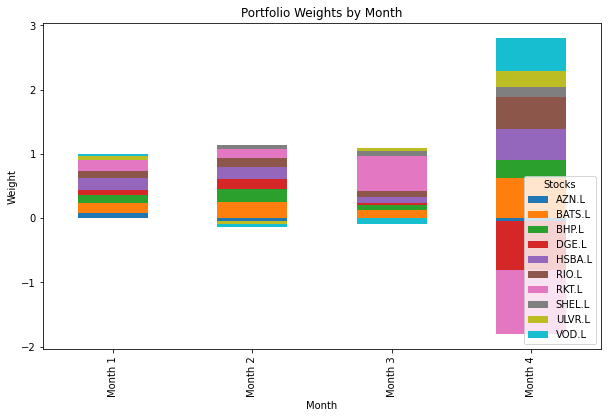

In [63]:
import matplotlib.pyplot as plt
portfolio_weights = pd.DataFrame()
stock_names = ['AZN.L', 'BATS.L', 'BHP.L', 'DGE.L', 'HSBA.L', 'RIO.L', 'RKT.L', 'SHEL.L', 'ULVR.L', 'VOD.L']
# Main loop for monthly optimization
for month in range(1, 5):  # Assuming month indices are 1 through 4
    returns, covariance = read_data(month)
    optimal_weights = optimize_portfolio(returns.squeeze(), covariance)
    portfolio_weights[f'Month {month}'] = optimal_weights
# Plotting the portfolio weights
portfolio_weights.T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Portfolio Weights by Month')
plt.xlabel('Month')
plt.ylabel('Weight')
plt.legend(title='Stocks', labels=stock_names)
plt.show()


In [65]:
optimal_weights_all

[array([4.12270777e-14, 0.00000000e+00, 0.00000000e+00, 4.60660520e-14,
        0.00000000e+00, 3.38794923e-13, 1.90369002e-16, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00]),
 array([4.89488663e-01, 0.00000000e+00, 3.05504455e-16, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.31782773e-15, 1.01206350e-01,
        3.47586695e-01, 6.17182918e-02]),
 array([0.00000000e+00, 3.53777831e-14, 0.00000000e+00, 0.00000000e+00,
        4.89928199e-14, 0.00000000e+00, 2.84389339e-14, 2.56764893e-14,
        0.00000000e+00, 1.00000000e+00]),
 array([8.94979317e-02, 6.50592437e-13, 5.59864388e-13, 2.96490623e-01,
        8.77606948e-13, 7.07182998e-13, 5.53675264e-01, 4.89968169e-02,
        1.13393644e-02, 5.62269031e-13])]

In [64]:
data = {
    'AZN.L': [546.75, 307.5, 535.5, 466.75, 698.0, 466.5, 603.25],
    'BATS.L': [115.7500153, 76.2500076, 96.5000153, 96.5000153, 111.7500153, 124.5000076, 124.5000076],
    'BHP.L': [123.0000076, 101.5000153, 125.75, 241.75, 141.75, 156, 177.0000153],
    'DGE.L': [167.0000076, 128.0000076, 153.75, 134, 155.0000076, 127, 153.0000076],
    'HSBA.L': [26.625, 17.2500005, 19.75, 22.125, 25.5, 25.5, 30.875],
    'RIO.L': [210.2500153, 178.5000153, 225.2500153, 297.5, 340, 312.25, 360.25],
    'RKT.L': [237.7500153, 243.2500076, 331, 296.25, 302.2500076, 273.75, 320.75],
    'SHEL.L': [109.5000153, 121.0000153, 133, 101.0000153, 118.5000153, 146.75, 139.5000076],
    'ULVR.L': [83.7500076, 135.5, 154, 110.0000153, 132.0000076, 129.75, 155],
    'VOD.L': [6.25, 5.5, 6.375, 6.375, 5.5, 3.625, 4.125]
}

# Convert the dictionary to a DataFrame
prices_df = pd.DataFrame(data)

# Define the buy and sell prices for each month
jan_buy_prices = prices_df.iloc[0]
feb_sell_prices = prices_df.iloc[1]
feb_buy_prices = prices_df.iloc[2]
mar_sell_prices = prices_df.iloc[3]
mar_buy_prices = prices_df.iloc[4]
apr_sell_prices = prices_df.iloc[5]



# Calculate profit for each month
profit_feb = ((feb_sell_prices - jan_buy_prices)/ jan_buy_prices) * optimal_weights[0] 
profit_mar = ((mar_sell_prices - feb_buy_prices)/ feb_buy_prices) * optimal_weights[1] 
profit_apr = ((apr_sell_prices - mar_buy_prices)/ mar_buy_prices) * optimal_weights[2]

# Sum the profits for the total profit
total_profit = profit_feb.sum() + profit_mar.sum() + profit_apr.sum()

total_profit


0.17380674053637676

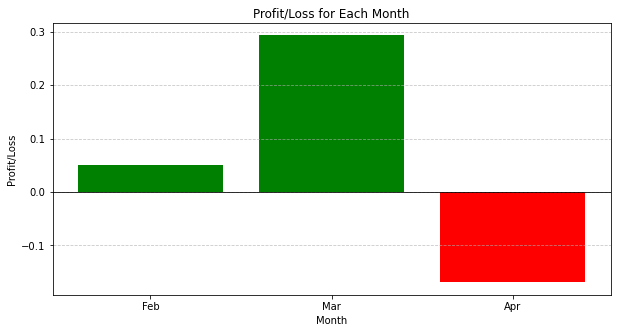

In [67]:
# Prepare data for plotting
months = ['Feb', 'Mar', 'Apr']
profits = [profit_feb.sum(), profit_mar.sum(), profit_apr.sum()]

# Plot the profits of each month
plt.figure(figsize=(10, 5))
plt.bar(months, profits, color=['green' if p > 0 else 'red' for p in profits])
plt.title('Profit/Loss for Each Month')
plt.xlabel('Month')
plt.ylabel('Profit/Loss')
plt.axhline(0, color='black', linewidth=0.8)  # Add a line at y=0 for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [68]:
profit_feb.sum()

0.049822434169819844

In [69]:
profit_mar.sum()

0.29329382869533005

In [70]:
profit_apr.sum()

-0.16930952232877314